## IMPORTING LIBS

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
num_classes = 10
epochs = 10

## IMPORTING DATASET

In [2]:
train_df=pd.read_csv('mnist_train.csv')
test_df=pd.read_csv('mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


## SPLIT TRAIN DATA INTO X AND Y

In [6]:
##convert data into float which is acceptable
##to keras
train_data=np.array(train_df, dtype='float32')
test_data=np.array(test_df, dtype='float32')

In [7]:
##divide into x and y and scaling all values between 0 and 1
# and since greyscale values are between 0 and 255(max) so divide by 255
x_train=train_data[:,1:]/255
y_train=train_data[:,0]
x_test=test_data[:,1:]/255
y_test=test_data[:,0]

## Train-test-valid dataset
done using scikitlearn lib

In [8]:
x_train,x_validate, y_train, y_validate=train_test_split(x_train,y_train,test_size=0.2, random_state=1)

## Visualise the training 

# CREATE THE CNN MODEL

In [9]:
image_rows=28
image_cols=28
image_shape=(image_rows,image_cols,1)

In [10]:
x_train =x_train.reshape(x_train.shape[0], *image_shape)
x_test =x_test.reshape(x_test.shape[0], *image_shape)
x_validate =x_validate.reshape(x_validate.shape[0], *image_shape)

In [11]:
cnn_model=Sequential([
    Conv2D(filters=32,kernel_size=3, activation='relu', input_shape=image_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    Flatten(), #flatten out the layers
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

## Compile the model

In [12]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'] )

## Training the model

In [13]:
cnn_model.fit(
    x_train, 
    y_train, 
    epochs=20, 
    validation_data=(x_validate,y_validate)
)

Epoch 1/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4705 - accuracy: 0.8350 - val_loss: 0.3413 - val_accuracy: 0.8819
Epoch 2/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3197 - accuracy: 0.8856 - val_loss: 0.3111 - val_accuracy: 0.8906
Epoch 3/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2808 - accuracy: 0.8995 - val_loss: 0.2980 - val_accuracy: 0.8923
Epoch 4/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2562 - accuracy: 0.9063 - val_loss: 0.2778 - val_accuracy: 0.9012
Epoch 5/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2385 - accuracy: 0.9123 - val_loss: 0.2841 - val_accuracy: 0.8978
Epoch 6/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.2241 - accuracy: 0.9171 - val_loss: 0.2930 - val_accuracy: 0.8972
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2108 - accuracy: 0.9227 - val_loss: 0.2915 -

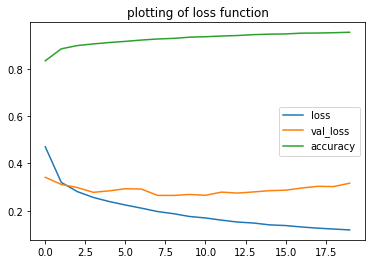

In [14]:
model_losses=pd.DataFrame(cnn_model.history.history)
model_losses['loss']
plt.plot(model_losses['loss'], label='loss')
plt.plot(model_losses['val_loss'], label='val_loss')

plt.title('plotting of loss function')
plt.plot(model_losses['accuracy'], label='accuracy')
plt.legend()

<AxesSubplot:>

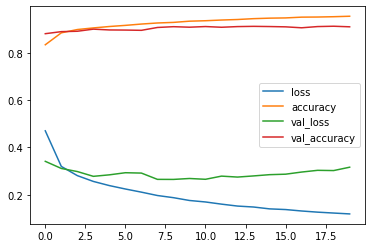

In [15]:
model_losses.plot()

## EVALUATE/SCORE THE MODE

In [16]:
score=cnn_model.evaluate(x_test, y_test, verbose=0)
score

[0.2843686640262604, 0.9157999753952026]

In [17]:
print(f'test loss={score[0]}')
print(f'test accuracy={score[1]}')

test loss=0.2843686640262604
test accuracy=0.9157999753952026


In [18]:
#predictions
yestimated=cnn_model.predict(x_test)

In [19]:
yestimated

array([[9.9998629e-01, 2.0636256e-18, 1.8718474e-06, ..., 7.0662104e-14,
        5.7762456e-10, 3.9355929e-15],
       [3.6200874e-13, 1.0000000e+00, 6.2075102e-15, ..., 1.2207701e-15,
        1.6923794e-13, 1.2191144e-21],
       [2.6745375e-02, 1.5762168e-06, 8.9907753e-01, ..., 6.5313518e-11,
        1.0418624e-08, 2.7410478e-09],
       ...,
       [4.4667262e-20, 4.6343424e-20, 7.3244428e-18, ..., 7.6096560e-17,
        1.0000000e+00, 4.0531750e-25],
       [5.2612398e-10, 7.9417171e-20, 6.5000072e-15, ..., 1.8713567e-14,
        1.0000000e+00, 2.5009649e-13],
       [1.7535405e-05, 9.9969923e-01, 2.2475402e-05, ..., 1.2658106e-11,
        3.3988921e-09, 1.6904851e-11]], dtype=float32)